In [101]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# file_path = './output-path-tfmc-dola-all-layer.json'
file_path = 'mmlu_results/mmlu-philosophy-dola-visualize-all-layer.json'
# file_path = 'mmlu_results/mmlu-college_mathematics-dola-visualize-all-layer.json'
college_mathematics_accu_per_layer = [29, 31, 28, 28, 23, 31, 27, 31, 21, 31, 31, 20, 26, 31, 34, 31, 25, 31, 25, 27, 31, 37, 35, 34, 34, 33, 28, 30, 30, 32, 30, 30]
philosophy_accu_per_layer = [24.12, 24.12, 18.97, 18.97, 18.65, 21.22, 23.47, 24.12, 18.65, 18.65,
           18.33, 21.22, 24.12, 24.12, 30.23, 30.55, 42.12, 45.48, 52.41, 51.45,
           55.98, 55.63, 56.91, 55.63, 56.59, 55.95, 57.56, 57.23, 57.23, 57.88,
           57.56, 57.88]
elementary_mathematics_accu_per_layer = [25.4, 26.72, 20.11, 20.9, 20.9, 20.11, 25.93, 26.72, 20.11, 26.46, 
           18.78, 24.87, 25.93, 26.72, 28.04, 27.25, 28.04, 29.89, 26.19, 28.04, 
           27.51, 26.98, 28.57, 30.42, 28.31, 27.51, 26.98, 28.31, 27.78, 25.93, 
           26.98, 24.87]
nutrition_accu_per_layer = [29.41, 29.41, 23.86, 22.55, 22.55, 22.55, 21.9, 29.41, 22.55, 22.22,
           21.57, 31.05, 29.08, 29.41, 35.95, 34.64, 40.52, 45.48, 47.71, 45.75,
           52.94, 52.61, 51.63, 51.96, 50.33, 52.94, 52.29, 52.61, 52.29, 50.98,
           50, 51.63]
high_school_geography_accu_per_layer = [35.35, 35.35, 27.78, 17.68, 17.68, 17.68, 19.7, 35.35, 17.68, 23.23,
           21.72, 21.72, 28.79, 35.35, 41.92, 37.88, 35.35, 43.43, 41.92, 41.92,
           52.53, 53.03, 54.55, 54.04, 49.49, 50.51, 48.48, 51.52, 48.99, 48.99,
           47.98, 49.49]


layers_info = []

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
    layers_info.append(data['premature_layer_dist_correct'])
    
vocab_path = 'tokenizer.json'
with open(vocab_path, 'r', encoding='utf-8') as file:
    vocab_data = json.load(file)
    

In [106]:
# index_to_token = {v: k for k, v in vocab_data["model"]['vocab'].items()}
import torch
questions_num = len(data["logits"])
for i in range(questions_num):
    data["logits"][i] = torch.tensor(data["logits"][i])

In [5]:
def get_logits_wo_normalization(data, questions_num):
    answer_position = {'A': 29909, 'B': 29933, 'C': 29907, 'D': 29928}    
    
    all_answer_correct = torch.zeros([questions_num, 33])
    all_answer_largest = torch.zeros([questions_num, 33])
    all_answer_largest_among_choices = torch.zeros([questions_num, 33])
    
    for i in range(questions_num):
        answer_vocab_index = answer_position[data["question"][i]['label'][0]]
        all_answer_correct[i] = data["logits"][i][:,:, answer_vocab_index].squeeze(1)
#         print(data["logits"][i][:,:, answer_vocab_index].squeeze(1)[0])
        all_answer_largest[i] = torch.max(data["logits"][i],-1)[0].squeeze(1)
        all_answer_largest_among_choices[i] = torch.max(data["logits"][i][:,:,[29909, 29933, 29907, 29928]],-1)[0].squeeze(1)
        
        '''
        if i == questions_num-1:
#             index = torch.max(data["logits"][i],-1)[1]
            index = torch.max(data["logits"][i][:,:,[29909, 29933, 29907, 29928]],-1)[1]
            for j in index:
#                 print(  index_to_token.get(int(j), "<unknown>") )
                print( int(j))
        '''
    return all_answer_correct, all_answer_largest, all_answer_largest_among_choices


In [107]:
data["logits"][i].size()

torch.Size([33, 1, 32000])

In [111]:

def get_logits_w_normalization(data, questions_num):
    answer_position = {'A': 29909, 'B': 29933, 'C': 29907, 'D': 29928}    
    
    all_answer_correct = torch.zeros([questions_num, 33])
    all_answer_largest = torch.zeros([questions_num, 33])
    all_answer_largest_among_choices = torch.zeros([questions_num, 33])

    for i in range(questions_num):
        # 获取答案索引
        answer_vocab_index = answer_position[data["question"][i]['label'][0]]

        # 对 logits 进行 softmax 归一化
        softmaxed_logits = torch.nn.functional.softmax(data["logits"][i], dim=-1)

        # 计算各个值
        all_answer_correct[i] = softmaxed_logits[:, :, answer_vocab_index].squeeze(1)
        all_answer_largest[i] = torch.max(softmaxed_logits, -1)[0].squeeze(1)
        all_answer_largest_among_choices[i] = torch.max(softmaxed_logits[:, :, [29909, 29933, 29907, 29928]], -1)[0].squeeze(1)

    return all_answer_correct, all_answer_largest, all_answer_largest_among_choices

In [112]:
all_answer_correct, all_answer_largest, all_answer_largest_among_choices = get_logits_wo_normalization(data, questions_num)
all_answer_correct, all_answer_largest, all_answer_largest_among_choices = get_logits_w_normalization(data, questions_num)

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import scipy.stats
from scipy.stats import wasserstein_distance

def kl_divergence(p, q, epsilon=1e-10):
    """
    计算两个分布之间的 KL 散度。
    :param p: 第一个分布 (原始得分)
    :param q: 第二个分布 (原始得分)
    :param epsilon: 避免 log(0) 的微小值
    """
    p_hist, bin_edges = np.histogram(p, bins=10, density=True)
    q_hist, _ = np.histogram(q, bins=10, density=True)
    import pdb; pdb.set_trace()
    p_hist /= p_hist.sum()  # 归一化
    q_hist /= q_hist.sum()  # 归一化
    p_hist = np.clip(p_hist, epsilon, 1)
    q_hist = np.clip(q_hist, epsilon, 1)
    
    return np.sum(p_hist * np.log(p_hist / q_hist))

def wasserstein_distance_cal(p, q):
    """
    计算 Wasserstein 距离，同时考虑均值和标准差的差异。
    
    :param p: 第一个分布 (原始得分)
    :param q: 第二个分布 (原始得分)
    :return: (wasserstein 距离, 均值差异, 标准差差异)
    """
    # 计算 Wasserstein 距离
    w_dist = wasserstein_distance(p, q)

#     # 计算均值和标准差的差异
#     mean_diff = abs(np.mean(p) - np.mean(q))
#     std_diff = abs(np.std(p) - np.std(q))
    return w_dist


def plot_score_distributions(ax, scores_A, scores_B, group_index, bins=10):
    """
    绘制某一组的得分分布直方图，并返回直方图数据用于 IOU 计算。
    """
#     ax.hist(scores_A, bins=bins, color='blue', alpha=0.5)
#     ax.hist(scores_B, bins=bins, color='red', alpha=0.5)
    
    # 计算全局 bin_edges，确保两个分布的 bin 一致
    combined_scores = np.concatenate([scores_A, scores_B])
    bin_edges = np.histogram_bin_edges(combined_scores, bins=bins)  # 计算共享 bin
    
#     import pdb; pdb.set_trace()
    # 计算两个分布的直方图
    hist_A, _ = np.histogram(scores_A, bins=bin_edges)
    hist_B, _ = np.histogram(scores_B, bins=bin_edges)
    # 画直方图
    ax.hist(scores_A, bins=bin_edges, color='blue', alpha=0.5)
    ax.hist(scores_B, bins=bin_edges, color='red', alpha=0.5)
    
    ax.set_title(f'Layer {group_index}', fontsize=15)
    ax.set_xlabel('Score', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
#     ax.set_ylim(0, 200)
#     ax.set_xlim(-0.0001, 0.0001)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', which='major', labelsize=18)

    return hist_A, hist_B  # 返回直方图数据

def compute_histogram_iou(hist_A, hist_B):
    """
    计算两个直方图的 IOU (Intersection over Union)。
    """
    intersection = np.minimum(hist_A, hist_B).sum()
    union = np.maximum(hist_A, hist_B).sum()
    return intersection / (union + 1e-10)  # 避免除以零

def plot_wo_normalization(all_answer_correct, all_answer_largest_among_choices, accu_per_layer):
    all_answer_correct_new = all_answer_correct[:, 1:]
    all_answer_largest_among_choices_new = all_answer_largest_among_choices[:, 1:]
    group_size = 8
    num_layers = all_answer_correct_new.shape[1]  # 32 层
    rows = (num_layers + group_size - 1) // group_size  # 计算行数

    fig, axes = plt.subplots(rows, group_size, figsize=(group_size * 4, rows * 3))
    axes = axes.flatten()

#     kl_values = []
    mean_scores_A = []
    mean_scores_B = []
    iou_values = []
    for i in range(num_layers):
        scores_A = all_answer_correct_new[:, i].numpy()
        scores_B = all_answer_largest_among_choices_new[:, i].numpy()

        # 绘制分布
        hist_A, hist_B = plot_score_distributions(axes[i], scores_A, scores_B, i)

        # 计算 KL 散度
#         kl_value = kl_divergence(scores_A, scores_B)
#         import pdb; pdb.set_trace()
#         kl_value = wasserstein_distance_cal(scores_A, scores_B)
#         kl_values.append(kl_value)
        mean_scores_A.append(np.mean(scores_A))
        mean_scores_B.append(np.mean(scores_B))
        
        iou_values.append(compute_histogram_iou(hist_A, hist_B))

    # 移除多余的空白子图
    for j in range(num_layers, len(axes)):
        fig.delaxes(axes[j])

        # 创建全局 legend（放在图像外）
    handles = [plt.Line2D([0], [0], color='blue', lw=4, alpha=0.5, label='Score CA-Ori'),
               plt.Line2D([0], [0], color='red', lw=4, alpha=0.5, label='Score LA-Ori')]

    fig.legend(handles=handles, loc='upper center', fontsize=20, ncol=2, bbox_to_anchor=(0.5, 1.02))
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # 调整图像布局以适应全局 legend
#     plt.tight_layout()
    plt.show()

    # 创建双 y 轴图表
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # 绘制 KL 散度
    color = 'purple'
    ax1.set_xlabel('Layer Index')
    ax1.set_ylabel('Accuracy', color=color)
    ax1.plot(range(num_layers), accu_per_layer, marker='o', linestyle='-', color=color, label='Accu. Per Layer')
    ax1.tick_params(axis='y', labelcolor=color)

    # 添加标题和网格
    plt.title(' Accuracy per Layer')
    ax1.grid(True, linestyle='--', alpha=0.6)

    # 显示图表
    plt.show()

    # 创建均值变化的折线图
    fig, ax = plt.subplots(figsize=(8, 5))

    ax.plot(range(num_layers), mean_scores_A, marker='o', linestyle='-', color='blue', label='Mean Score A')
    ax.plot(range(num_layers), mean_scores_B, marker='s', linestyle='-', color='red', label='Mean Score B')

    ax.set_xlabel('Layer Index')
    ax.set_ylabel('Mean Score')
    ax.set_title('Mean Score Variation per Layer')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    
    
    # 绘制 IOU per Layer
    fig, ax = plt.subplots(figsize=(8, 5))

    ax.plot(range(num_layers), iou_values, marker='o', linestyle='-', color='green', label='Histogram IOU')

    ax.set_xlabel('Layer Index', fontsize=14)
    ax.set_ylabel('IOU', fontsize=14)
    ax.set_title('Histogram IOU per Layer', fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.show()
    
    
    # 计算 IOU 变化率 (delta IOU)
    delta_iou = np.diff(iou_values)

    # 计算 IOU 变化率的变化 (delta^2 IOU)
    delta2_iou = np.diff(delta_iou)
    # 创建一个图表，将三个折线图绘制在同一个坐标轴上
    fig, ax1 = plt.subplots(figsize=(8, 6))

    # 绘制 IOU per Layer
    ax1.plot(range(num_layers), iou_values, marker='o', linestyle='-', color='green', label='Histogram IOU')
    ax1.set_xlabel('Layer Index', fontsize=14)
    ax1.set_ylabel('IOU', fontsize=14, color='green')
    ax1.tick_params(axis='y', labelcolor='green')
    ax1.grid(True, linestyle='--', alpha=0.6)

    # 创建第二个 y 轴 (Δ IOU)
    ax2 = ax1.twinx()
    ax2.plot(range(1, num_layers ), delta_iou, marker='s', linestyle='-', color='blue', label='Δ IOU')
    ax2.set_ylabel('Δ IOU', fontsize=14, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

#     # 创建第三个 y 轴 (Δ² IOU)
#     ax3 = ax1.twinx()
#     ax3.spines['right'].set_position(('outward', 60))  # 调整 Δ² IOU 轴的位置
#     ax3.plot(range(2, num_layers), delta2_iou, marker='^', linestyle='-', color='red', label='Δ² IOU')
#     ax3.set_ylabel('Δ² IOU', fontsize=14, color='red')
#     ax3.tick_params(axis='y', labelcolor='red')

    # 合并图例
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize=12, ncol=3)

    # 设置标题
    plt.title('Histogram IOU and Its Changes per Layer', fontsize=16)

    plt.show()


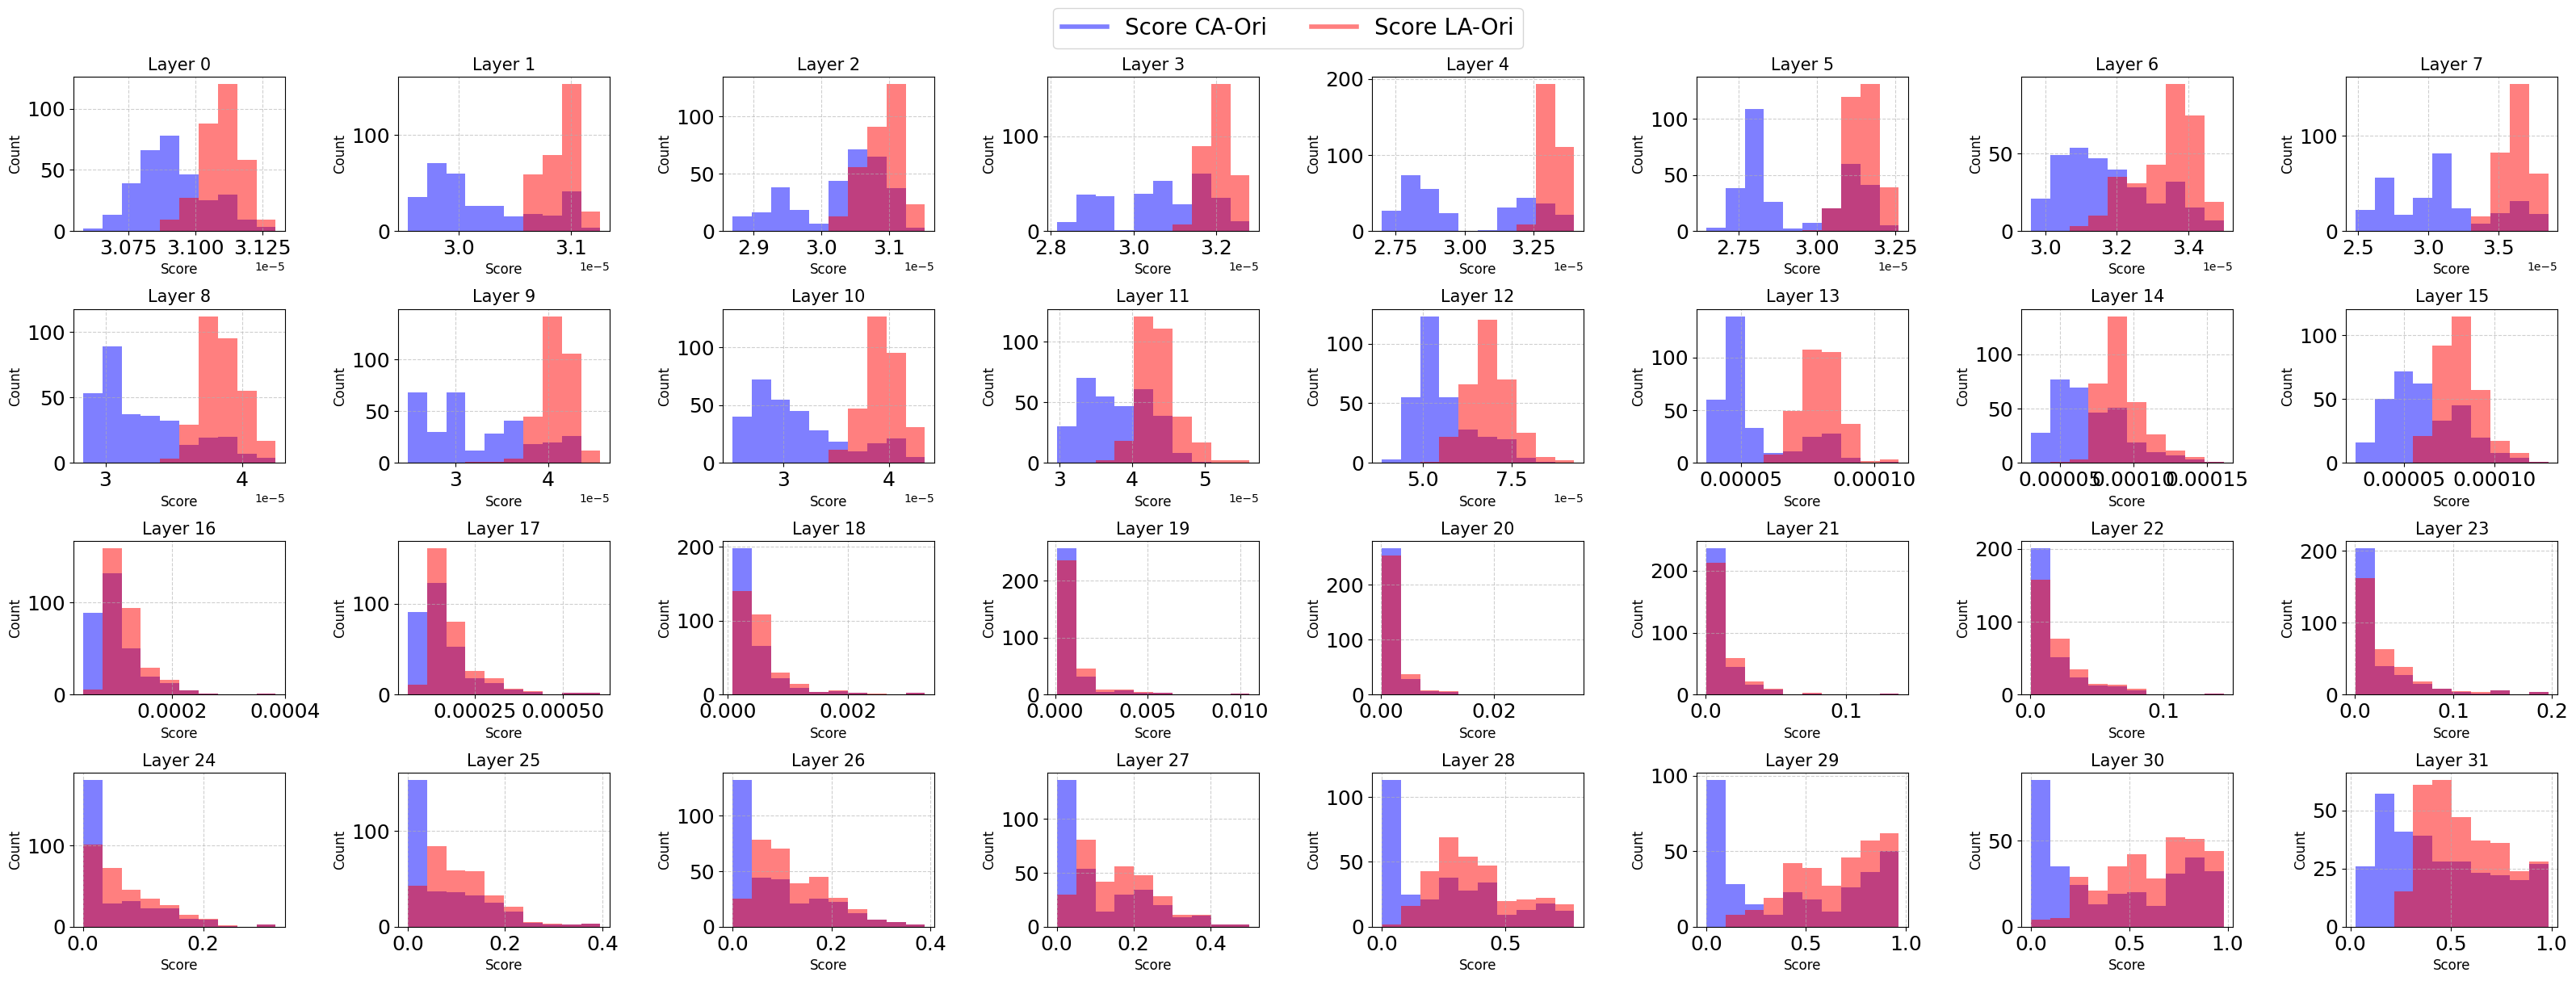

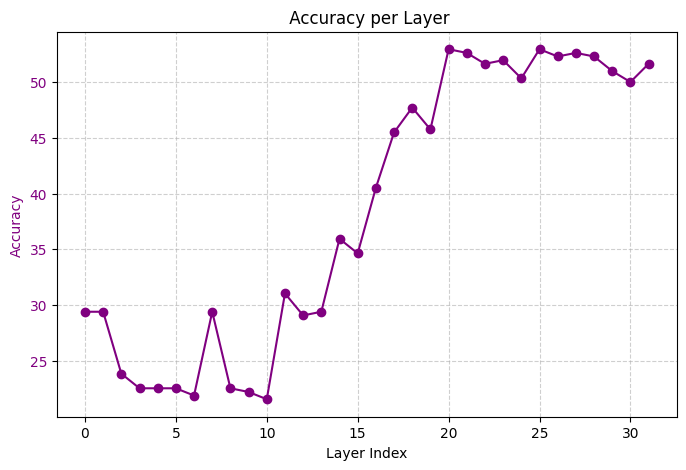

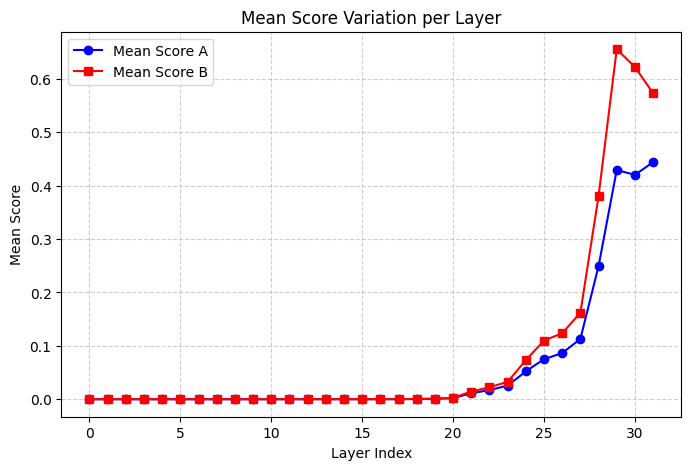

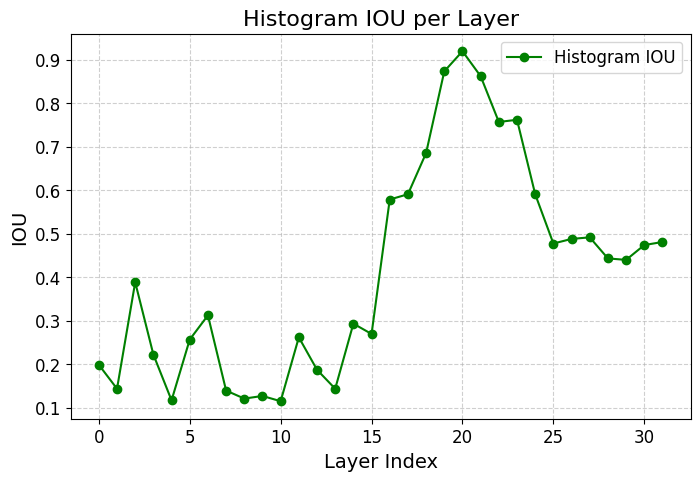

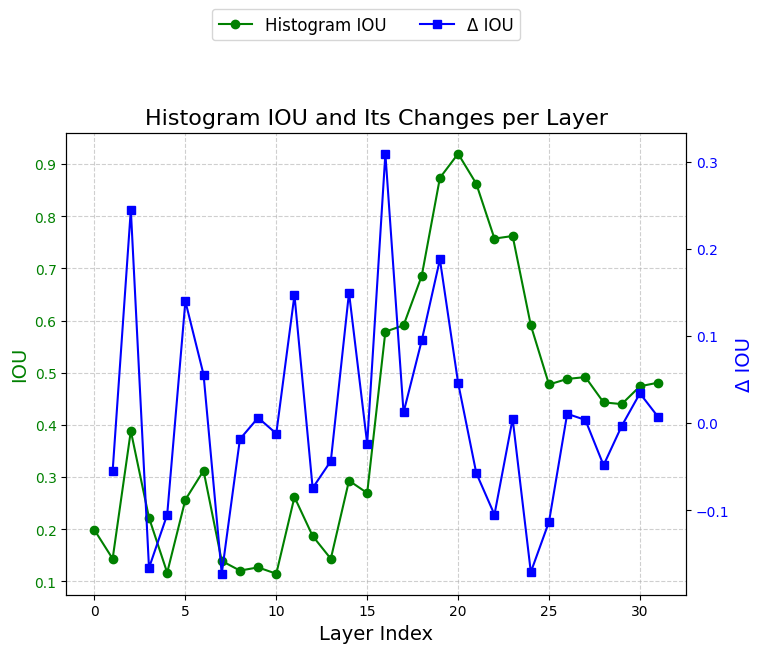

In [131]:
plot_wo_normalization(all_answer_correct, all_answer_largest_among_choices, nutrition_accu_per_layer)

In [99]:
# below TODO

In [ ]:
def calculate_JSD():
    stacked_premature_layers = torch.stack([dict_outputs[i][:, seq_i, :] for i in candidate_premature_layers], dim=0)
    # 2. Calculate the softmax values for mature_layer and all premature_layers
    softmax_mature_layer = F.softmax(dict_outputs[mature_layer][:, seq_i, :], dim=-1)  # shape: (batch_size, num_features)
    softmax_premature_layers = F.softmax(stacked_premature_layers, dim=-1)  # shape: (num_premature_layers, batch_size, num_features)

    # 3. Calculate M, the average distribution
    M = 0.5 * (softmax_mature_layer[None, :, :] + softmax_premature_layers)  # shape: (num_premature_layers, batch_size, num_features)

    # 4. Calculate log-softmax for the KL divergence
    log_softmax_mature_layer = F.log_softmax(dict_outputs[mature_layer][:, seq_i, :], dim=-1)  # shape: (batch_size, num_features)
    log_softmax_premature_layers = F.log_softmax(stacked_premature_layers, dim=-1)  # shape: (num_premature_layers, batch_size, num_features)
    '''
    M = 0.5 * (F.softmax(dict_outputs[mature_layer][:, seq_i, [29909, 29933, 29907, 29928]], dim=-1)[None, :, :] + F.softmax(stacked_premature_layers[:,:,[29909, 29933, 29907, 29928]], dim=-1))  # shape: (num_premature_layers, batch_size, num_features)

    log_softmax_mature_layer = F.log_softmax(dict_outputs[mature_layer][:, seq_i, [29909, 29933, 29907, 29928]], dim=-1)  # shape: (batch_size, num_features)
    log_softmax_premature_layers = F.log_softmax(stacked_premature_layers[:,:,[29909, 29933, 29907, 29928]], dim=-1)  # shape: (num_premature_layers, batch_size, num_features)
    '''
    # 5. Calculate the KL divergences and then the JS divergences
    kl1 = F.kl_div(log_softmax_mature_layer[None, :, :], M, reduction='none').mean(-1)  # shape: (num_premature_layers, batch_size)
    kl2 = F.kl_div(log_softmax_premature_layers, M, reduction='none').mean(-1)  # shape: (num_premature_layers, batch_size)

    # kl1 = F.kl_div(log_softmax_mature_layer[None, :, [29909, 29933, 29907, 29928]], M[:,:, [29909, 29933, 29907, 29928]], reduction='none').mean(-1)  # shape: (num_premature_layers, batch_size)
    # kl2 = F.kl_div(log_softmax_premature_layers[:,:, [29909, 29933, 29907, 29928]], M[:,:, [29909, 29933, 29907, 29928]], reduction='none').mean(-1)  # shape: (num_premature_layers, batch_size)

    js_divs = 0.5 * (kl1 + kl2)  # shape: (num_premature_layers, batch_size)

    # 6. Reduce the batchmean
    js_divs = js_divs.mean(-1)  # shape: (num_premature_layers,)
    premature_layer = candidate_premature_layers[int(js_divs.argmax().cpu().item())]
    premature_layer_dist[premature_layer] += 1

    premature_layers.append(premature_layer)


In [26]:
layers_info

[{'0': 0,
  '1': 0,
  '2': 87,
  '3': 0,
  '4': 10,
  '5': 0,
  '6': 0,
  '7': 0,
  '8': 3,
  '9': 0,
  '10': 0,
  '11': 0,
  '12': 0,
  '13': 0,
  '14': 0,
  '15': 0,
  '16': 0,
  '17': 0,
  '18': 0,
  '19': 0,
  '20': 0,
  '21': 0,
  '22': 0,
  '23': 0,
  '24': 0,
  '25': 0,
  '26': 0,
  '27': 0,
  '28': 0,
  '29': 0,
  '30': 0,
  '31': 0}]

In [ ]:
len